# MNIST Classifier

In [4]:
# load data

from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [5]:
mnist = fetch_openml("mnist_784")

In [ ]:
mnist

In [6]:
# Separando features e target
X, y = np.array(mnist.data), np.array(mnist.target).astype(int)

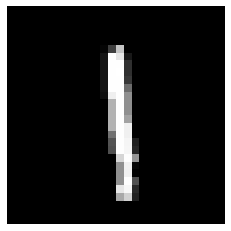

In [7]:
import matplotlib.pyplot as plt
some_digit =X[8]
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img,
          cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y[8]

1

In [7]:
X.shape

(70000, 784)

# Separaçao Treino test

1. Vamos separar as primerias 60.000 para treino e o restante para teste.  
2. Em seguida vamos embaralhar o o conjunto de treino, para obter maior homegeniedade de ocorrencia de dígitos no `k-fold`

In [8]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y[shuffle_index]

# Classicador Binário identificador de 5s

In [10]:
y_train_5 = (y_train == 5) # Coletando dados de treino com target 5
y_test_5 = (y_test == 5) # Coletando dados de teste com target 5

In [11]:
# Treinando um modelo 
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()# Gradiente descendente estocástico
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [12]:
sgd_clf.predict([X_train[480]])

array([False])

In [13]:
# Aplicando validação cruzada

from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score(sgd_clf,X_train, y= y_train_5, cv = 3, scoring='accuracy')

array([0.96235, 0.96065, 0.9642 ])

Embora a acuracia esteja alta, esse modelo é uma merda. Vamos avaliar outras métricas

# Validaçõo cruzada com matriz de confusão

In [15]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53686,   893],
       [ 1468,  3953]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_train_pred)) 
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.815724308708213
0.7292012543811105
0.7700399337683841


# Compensação do Precsion x Recall

In [19]:
y_scores = sgd_clf.decision_function(([X_train[8]]))
print(y_scores)

threshold = 0
(y_scores>threshold)


[-1260.34682641]


array([False])

In [21]:
threshold = 200000
(y_scores>threshold)

array([False])

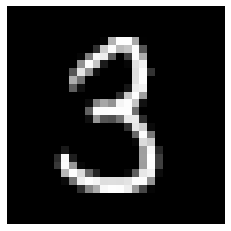

3


In [55]:
import matplotlib.pyplot as plt
some_digit =X_train[8]
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img,
          cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.show()

print(y_train[8])

In [23]:
from sklearn.metrics import precision_recall_curve

y_score = cross_val_predict(sgd_clf,X_train,y_train_5, cv = 3, method = 'decision_function')
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

In [24]:
# 
print(precision[:-1])
print(recalls)
print(thresholds)

[0.09054467 0.09052948 0.09053099 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-82531.31402134 -82487.1534983  -82231.95408247 ...  39499.45867915
  40597.02683975  41429.92920692]


In [25]:
def plot_precision_recal_vs_threshold(precision,recall, thresholds):
    
    plt.plot(thresholds, precision[:-1], 'b--',label = 'Precision')
    plt.plot(thresholds, recall[:-1], 'g-', label = "Recall")
    plt.xlabel('Threshold')
    plt.legend(loc = 'center left')
    plt.legend(loc='center left')
    plt.ylim([0,1])

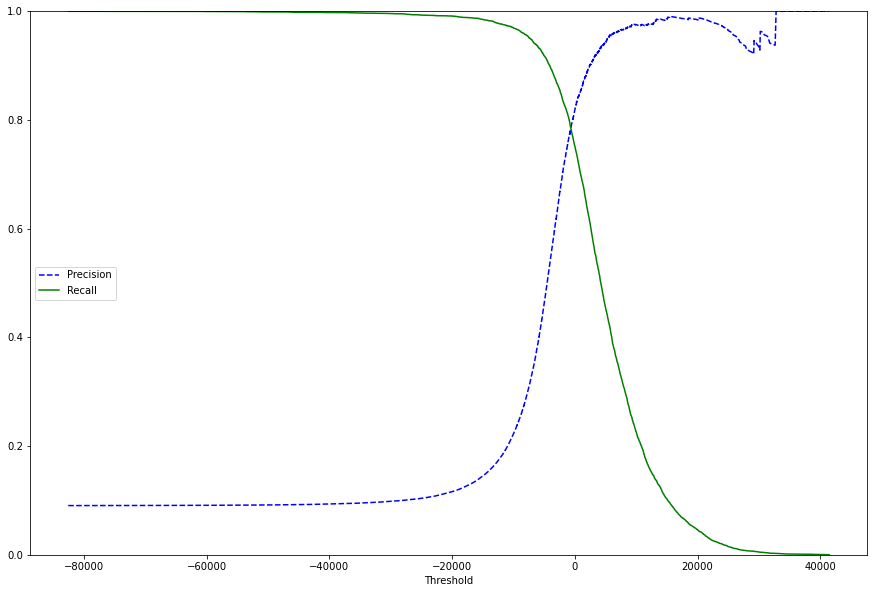

In [26]:
plt.figure(figsize=(15,10))
plot_precision_recal_vs_threshold(precision,recalls, thresholds)

# Curva ROC

A Curva ROC mede Tx Verdadeiros Positivos x Tx Falsos positivos

In [30]:
from sklearn.metrics import roc_curve

In [31]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

In [32]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99763645, 0.99763645,
       1.        ])

In [35]:
tpr

array([0.00000000e+00, 1.84467810e-04, 2.76701716e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [36]:
thresholds

array([  41430.92920692,   41429.92920692,   32788.5428468 , ...,
        -82487.1534983 ,  -82531.31402134, -167840.45350886])

In [37]:
def plot_roc_curve(fpr, tpr, label = None):
    
    plt.plot(fpr, tpr, label = label)
    plt.plot([0,1],[0,1], '--')
    plt.axis([0,1,0,1])
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderiso Positivos')

    

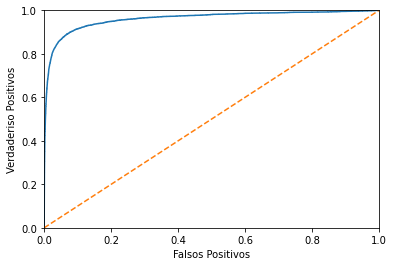

In [38]:
plot_roc_curve(fpr, tpr)
plt.show()

__Uma boa métrica de avaliação da área sob a curva ROC, se for 1 temos o classificador perfeito. 
Se for 0.5 é totalmente aleatório__  

Podemos calcular com o `roc_auc_score`

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_score)

0.9614904561051529

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_cls = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_cls, X_train, y_train_5, cv = 3, method='predict_proba')

In [41]:
y_scores_forest = y_probas_forest[:,1]

In [45]:
y_scores_forest

array([0.79, 0.  , 0.01, ..., 0.  , 0.  , 0.  ])

In [48]:
y_probas_forest


array([[0.21, 0.79],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [49]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

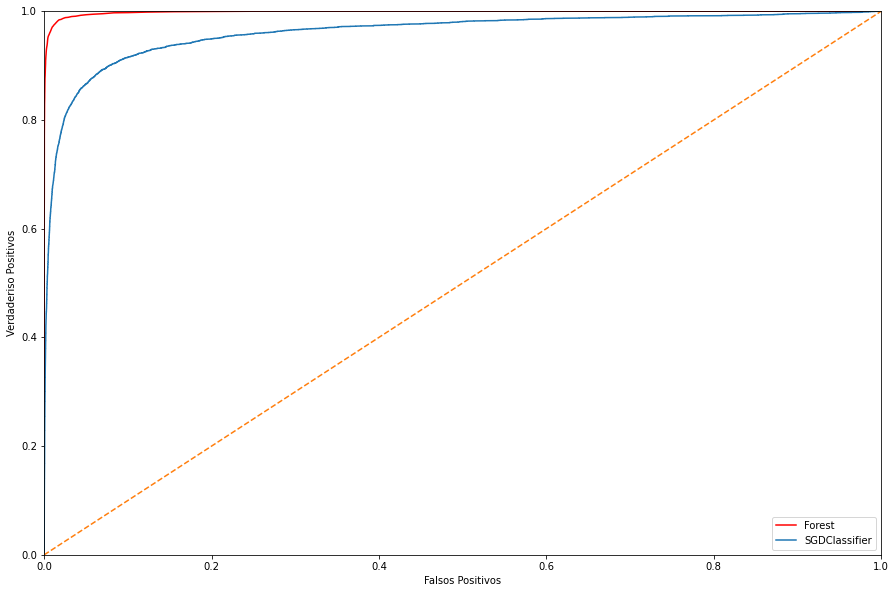

In [51]:

plt.figure(figsize=(15,10))
plt.plot(fpr_forest,tpr_forest, label = 'Forest', c='red')
plot_roc_curve(fpr, tpr, 'SGDClassifier')
plt.legend(loc='lower right')
plt.show()

In [52]:
roc_auc_score(y_train_5,y_scores_forest)

0.9984928318460031

# Multclass

A sklearn já cuida de realizar o treinamento OvA (um contra todos) por trás dos panos, ou seja ela treina um modelo para cada classe  

In [56]:
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [62]:
sgd_clf.predict([X_train[8]])

array([3])

In [64]:
some_digit_scores = sgd_clf.decision_function([X_train[0]])
some_digit_scores

array([[-20802.83273548, -24539.25583155, -11493.18082037,
         -3308.65032868,  -7920.24586719,    -30.03657911,
         -3272.08464752, -24649.28088698,  -3599.23043857,
         -4274.21500269]])

In [65]:
np.argmax(some_digit_scores)

5

In [66]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
sgd_clf.classes_[5]

5

__Podemos Fazer a skearn realizar o treinamento OvO (um contra um) ou OvA (um contra todos) com as classes `OneVsOneClassifier` e `OneVsRestClassifier`__

In [67]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [68]:
ovo_cls = OneVsOneClassifier(SGDClassifier(random_state=0))
ovo_cls.fit(X_train, y_train)
ovo_cls.predict([X_train[11]])

array([0])

__Com o RandomForest não é necessário essa abordagem, pois é um algoritmo que pode realizar precisões multclass__

In [69]:
forest_cls.fit(X_train, y_train)
forest_cls.predict([X_train[11]])

array([0])

In [70]:
forest_cls.predict_proba([X_train[11]])

array([[0.97, 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.01]])

# Avaliação dos Classificadores

In [71]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring='accuracy')

array([0.8789 , 0.8733 , 0.85975])

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

In [73]:
cross_val_score(sgd_clf, X_train_scaler, y_train, cv = 3, scoring='accuracy')

C:\Users\Vinicius\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.89885, 0.9044 , 0.8996 ])